In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from tqdm import tqdm_notebook as tqdm

In [62]:
def proportion(x, mu0x, mu1x, mu0z, mu1z, sigma, N):

    f0x = norm.pdf(x, mu0x, sigma)
    f1x = norm.pdf(x, mu1x, sigma)
    
    labels = np.zeros(N)
    
    for i in range(N):
        coin_flip = np.random.binomial(1, 0.5)
        if coin_flip < 0.5:
            z = np.random.normal(mu0z, sigma, 1)[0]
        else:
            z = np.random.normal(mu1z, sigma, 1)[0]
            
        f0z = norm.pdf(z, mu0z, sigma)
        f1z = norm.pdf(z, mu1z, sigma)
        
        new_pi0 = f0z / (f0z + f1z)
            
        labels[i] = np.argmax([new_pi0 * f0x, (1 - new_pi0) * f1x])
            
    return np.sum(labels)/N

The setting in "supervised multiview learning take 1.ipynb" turned out to be a setting in which more things were changing as we varied the distance of between mu1 and mu2 then just the information available from $ Z $. In this notebook, we make similar assumptions but instead try to create a setting that is more tractable. 

First we validate the claim that the "product" classifier is "natural",
\begin{align*}
P(Y | X, Z) &= \\
P(X, Z | Y) &= \pi_{0} P(X, Z | Y = 0) + \pi_{1} P(X, Z | Y = 1) \\
&= \pi_{0} P(X | Y = 0) P(Z | Y = 0) + \pi_{1} P(X | Y = 1)P(Z | Y = 1) 
\end{align*}

Consider $ X | Y = i \sim N(\mu_{X, i}, \sigma^{2}) $ where $ \mu_{X, i} = (-1)^{i + 1} $ for $ i \in \{0, 1\} $. Now consider $ Z | Y = i \sim N(\mu_{Z, i}, \sigma^{2}) $ where $ \mu_{Z, i} = (-1)^{i + 1} \{0, 1, .., 4\} $ 



[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

[0.57, 0.5, 0.41, 0.46, 0.58, 0.49, 0.47, 0.56, 0.51, 0.54, 0.49, 0.53, 0.49, 0.47, 0.55, 0.48, 0.46, 0.4, 0.54, 0.44, 0.54, 0.47, 0.5, 0.57, 0.54, 0.46, 0.45, 0.4, 0.48, 0.48, 0.53, 0.49, 0.51, 0.49, 0.36, 0.53, 0.53, 0.54, 0.44, 0.5, 0.5, 0.47, 0.5, 0.43, 0.52, 0.51, 0.52, 0.48, 0.57, 0.46, 0.51, 0.56, 0.55, 0.55, 0.42, 0.42, 0.5, 0.54, 0.52, 0.56, 0.53, 0.49, 0.47, 0.53, 0.57, 0.48, 0.57, 0.46, 0.49, 0.53, 0.5, 0.47, 0.49, 0.44, 0.51, 0.59, 0.49, 0.48, 0.47, 0.56, 0.47, 0.48, 0.46, 0.5, 0.54, 0.4, 0.4, 0.48, 0.55, 0.48, 0.58, 0.46, 0.44, 0.49, 0.52, 0.47, 0.47, 0.52, 0.52, 0.52, 0.54, 0.47, 0.57, 0.5, 0.55, 0.6, 0.5, 0.46, 0.5, 0.46, 0.54, 0.47, 0.52, 0.54, 0.53, 0.47, 0.48, 0.51, 0.49, 0.49, 0.46, 0.57, 0.45, 0.44, 0.45, 0.45, 0.52, 0.47, 0.51, 0.46, 0.57, 0.53, 0.51, 0.63, 0.45, 0.52, 0.48, 0.53, 0.59, 0.51, 0.59, 0.51, 0.59, 0.48, 0.62, 0.47, 0.4, 0.47, 0.46, 0.52, 0.46, 0.51, 0.53, 0.44, 0.56, 0.51, 0.55, 0.48, 0.49, 0.51, 0.48, 0.48, 0.52, 0.54, 0.61, 0.61, 0.49, 0.5, 0.52, 0.4

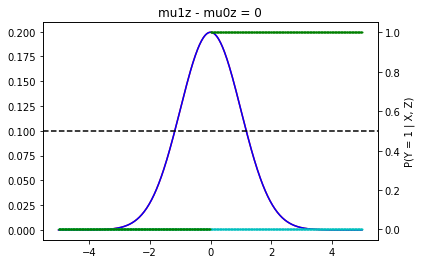

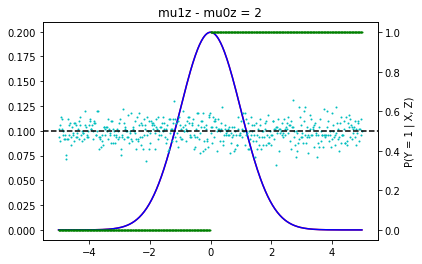

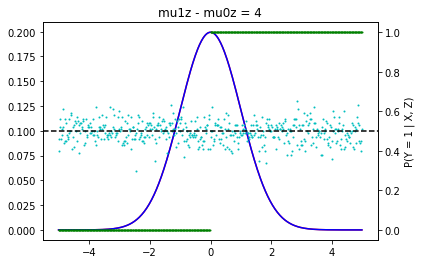

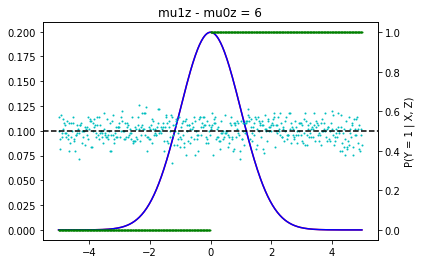

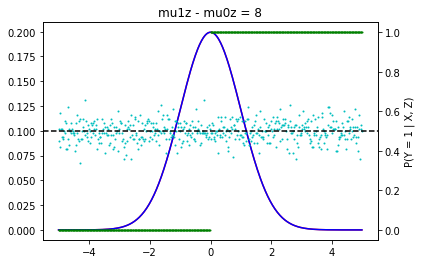

In [63]:
pi0 = 0.5
mu0x = 0
mu1x = 0

n_means = 5

mu0z = -1*np.arange(5)
mu1z = np.arange(5)

sigma = 1

N = 100

xs_plot = np.arange(-5, 5, step = 0.02)
for mu in tqdm(mu0z):
    fig, ax = plt.subplots(1,1)
    
    props = [proportion(x, mu0x, mu1x, mu, -1*mu, sigma, N) for x in xs_plot]
    print(props)
    
    ax.plot(xs_plot, pi0*norm.pdf(xs_plot, mu0x, sigma), c = 'r')
    ax.plot(xs_plot, (1 - pi0)*norm.pdf(xs_plot, mu1x, sigma), c = 'b')

    ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.set_ylabel("P(Y = 1 | X, Z)")#, color = 'c') 
    ax2.scatter(xs_plot, np.array(props), s = 1, c = 'c')
    ax2.axhline(y = 0.5, c = 'k', ls = '--')
    ax2.scatter(xs_plot, np.concatenate((np.zeros(int(len(xs_plot)*pi0)), np.ones(int(len(xs_plot)*(1 - pi0))))), c = 'g', s = 1)

    ax.set_title('mu1z - mu0z = %i'%(-1*mu - mu))

In [56]:
def L_star_linear(pi0, mu0, mu1, sigma, label = -1):
    m = (mu0 + mu1)/2
    left = pi0 * (1 - norm.cdf(m, mu0, sigma))
    right = (1 - pi0) * norm.cdf(m, mu1, sigma)
    
    #if label == -1:
    return left + right
    #elif label == 0:
    #    return left
    #else:
    #    return right
    
L_star_linear(pi0, -2, 2, 1)

0.0227501319481792